In [23]:
# Importing required libraries.
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

In [2]:
# Reading the CSV file using Pandas.
df_og = pd.read_csv(r'C:\Users\Admin\Desktop\holly_bolly_10733_final.csv')

In [3]:
# Displaying the first 5 records to view the columns.
df_og.head()

,name,artist,danceability,key,mode,instrumentalness,duration,energy,loudness,speechiness,acousticness,tempo,liveness,valence,popularity,hollywood
0,ishq kaminaa,djjiten,0.782,5,0,0.000013,1.907673,0.972,-7.542,0.1480,0.02550,0.608960,0.3690,0.557,0.000000,0
1,bhool ja,shaan,0.696,0,0,0.000185,1.389656,0.888,-2.285,0.0336,0.05920,0.549908,0.1310,0.676,0.180905,0
2,tanha dil,shaan,0.621,7,0,0.000000,1.761857,0.704,-5.293,0.0236,0.10100,0.454296,0.1850,0.366,0.221106,0
3,sexy mama,bombayrockers,0.830,9,0,0.000001,1.402920,0.770,-4.135,0.1120,0.48300,0.454514,0.1270,0.927,0.135678,0
4,ari ari part 1,bombayrockers,0.758,7,1,0.000154,0.458445,0.918,-2.487,0.1080,0.00085,0.445791,0.0619,0.721,0.165829,0


In [4]:
# Displaying the Last 5 records to view the columns.
df_og.tail()

,name,artist,danceability,key,mode,instrumentalness,duration,energy,loudness,speechiness,acousticness,tempo,liveness,valence,popularity,hollywood
10728,summer skin,deathcabforcutie,0.615,2,0,0.033400,1.275043,0.476,-12.205,0.0337,0.161000,0.416304,0.0946,0.6110,0.236181,1
10729,take on me,a1,0.562,9,1,0.000002,1.382976,0.931,-4.809,0.0469,0.085900,0.750392,0.2690,0.5370,0.241206,1
10730,shiver,maroon5,0.620,0,1,0.000000,1.185173,0.919,-4.475,0.3570,0.039700,0.781939,0.8510,0.5070,0.000000,1
10731,matkustaja,egotrippi,0.488,9,1,0.000000,1.532019,0.615,-4.377,0.0295,0.034000,0.591155,0.2080,0.6860,0.256281,1
10732,special needs,placebo,0.300,10,0,0.811000,1.865448,0.564,-10.163,0.0341,0.000906,0.808826,0.0924,0.0405,0.000000,1


In [5]:
# Displaying the random 5 records to view the columns.
df_og.sample(5)

,name,artist,danceability,key,mode,instrumentalness,duration,energy,loudness,speechiness,acousticness,tempo,liveness,valence,popularity,hollywood
2685,youll never walk alone mono 2002 remaster,gerrythepacemakers,0.484,0,1,0.000000,1.050876,0.265,-11.101,0.0322,0.3940,0.516216,0.149,0.285,0.291457,1
7796,baila casanova album version spanish,paulinarubio,0.707,5,1,0.000002,1.454737,0.903,-5.665,0.0789,0.0524,0.540263,0.186,0.819,0.000000,1
8349,a thousand miles,vanessacarlton,0.559,11,1,0.000000,1.513858,0.845,-3.871,0.0379,0.2220,0.431446,0.164,0.304,0.000000,1
7554,please send me someone to love,sade,0.416,4,1,0.000018,1.422579,0.368,-10.988,0.0353,0.2580,0.817799,0.242,0.156,0.000000,1
2620,vicinity of obscenity,systemofadown,0.548,1,1,0.000003,1.129840,0.957,-3.189,0.1620,0.0533,0.498370,0.683,0.514,0.271357,1


In [6]:
# Dropping text values (we'll be using them in another approach).
df = df_og.drop(["name","artist"],axis=1)

In [7]:
# Converting the dataframe into numpy format for further processing.
df_numpy = df.to_numpy()

In [8]:
df_numpy.shape

(10733, 14)

In [9]:
# Finding the cosine distance of every record with every other record in the dataset.
cosine_sim = cosine_similarity(df_numpy,df_numpy)

In [10]:
# Printing the shape of the result
cosine_sim.shape

(10733, 10733)

In [11]:
# Viewing the third record from the original dataset. 
# This will be used as an input for getting recommendations.
df_og.iloc[2]

name                tanha dil
artist                  shaan
danceability            0.621
key                         7
mode                        0
instrumentalness            0
duration              1.76186
energy                  0.704
loudness               -5.293
speechiness            0.0236
acousticness            0.101
tempo                0.454296
liveness                0.185
valence                 0.366
popularity           0.221106
hollywood                   0
Name: 2, dtype: object

In [12]:
# Sorting the cosine distances of the input song with other songs in the ascending order. 
score_series = pd.Series(cosine_sim[2]).sort_values(ascending=False)

In [13]:
# Selecting indices of 5 songs which are closest to the input song.
top_5_indexes = list(score_series.iloc[1:6].index)

In [14]:
top_5_indexes

[113, 838, 277, 899, 600]

In [15]:
# Deriving the names of the recommended songs from the original dataset.
recommended_songs = []
for i in top_5_indexes:
        recommended_songs.append((list(df_og.name)[i],list(df_og.artist)[i]))

In [16]:
# Printing the recommended songs.
recommended_songs

[('mere dil mein aaj kya hai  the amorous lover mix', 'instantkarma'),
 ('tu junooniyat climax song', 'shreysinghal'),
 ('bas ek pal  remix', 'kk'),
 ('chori chori takna', 'darkmc'),
 ('farak', 'divine')]

In [17]:
indices = pd.Series(df_og['name'])

In [18]:
def recommendations(title, cosine_sim = cosine_sim):
    
    recommended_movies = []
    
    # gettin the index of the movie that matches the title
    idx = indices[indices == title].index[0]

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)

    # getting the indexes of the 5 most similar movies
    top_5_indexes = list(score_series.iloc[1:6].index)
    
    # populating the list with the titles of the best 5 matching movies
    for i in top_5_indexes:
        recommended_movies.append(((df_og.name)[i],(df_og.artist)[i]))
        
    return recommended_movies

In [19]:
recommended_songs = recommendations("numb")

In [22]:
# Printing the recommendations
for i,song in enumerate(recommended_songs):
    print("{}: {} by {}".format(i+1,song[0].title(),song[1].title()))

1: Sleeping Awake  2006 Remaster by Pod
2: A Place For My Head by Linkinpark
3: Dont Be Shy by Thelibertines
4: Papercut by Linkinpark
5: Disposable Teens by Marilynmanson


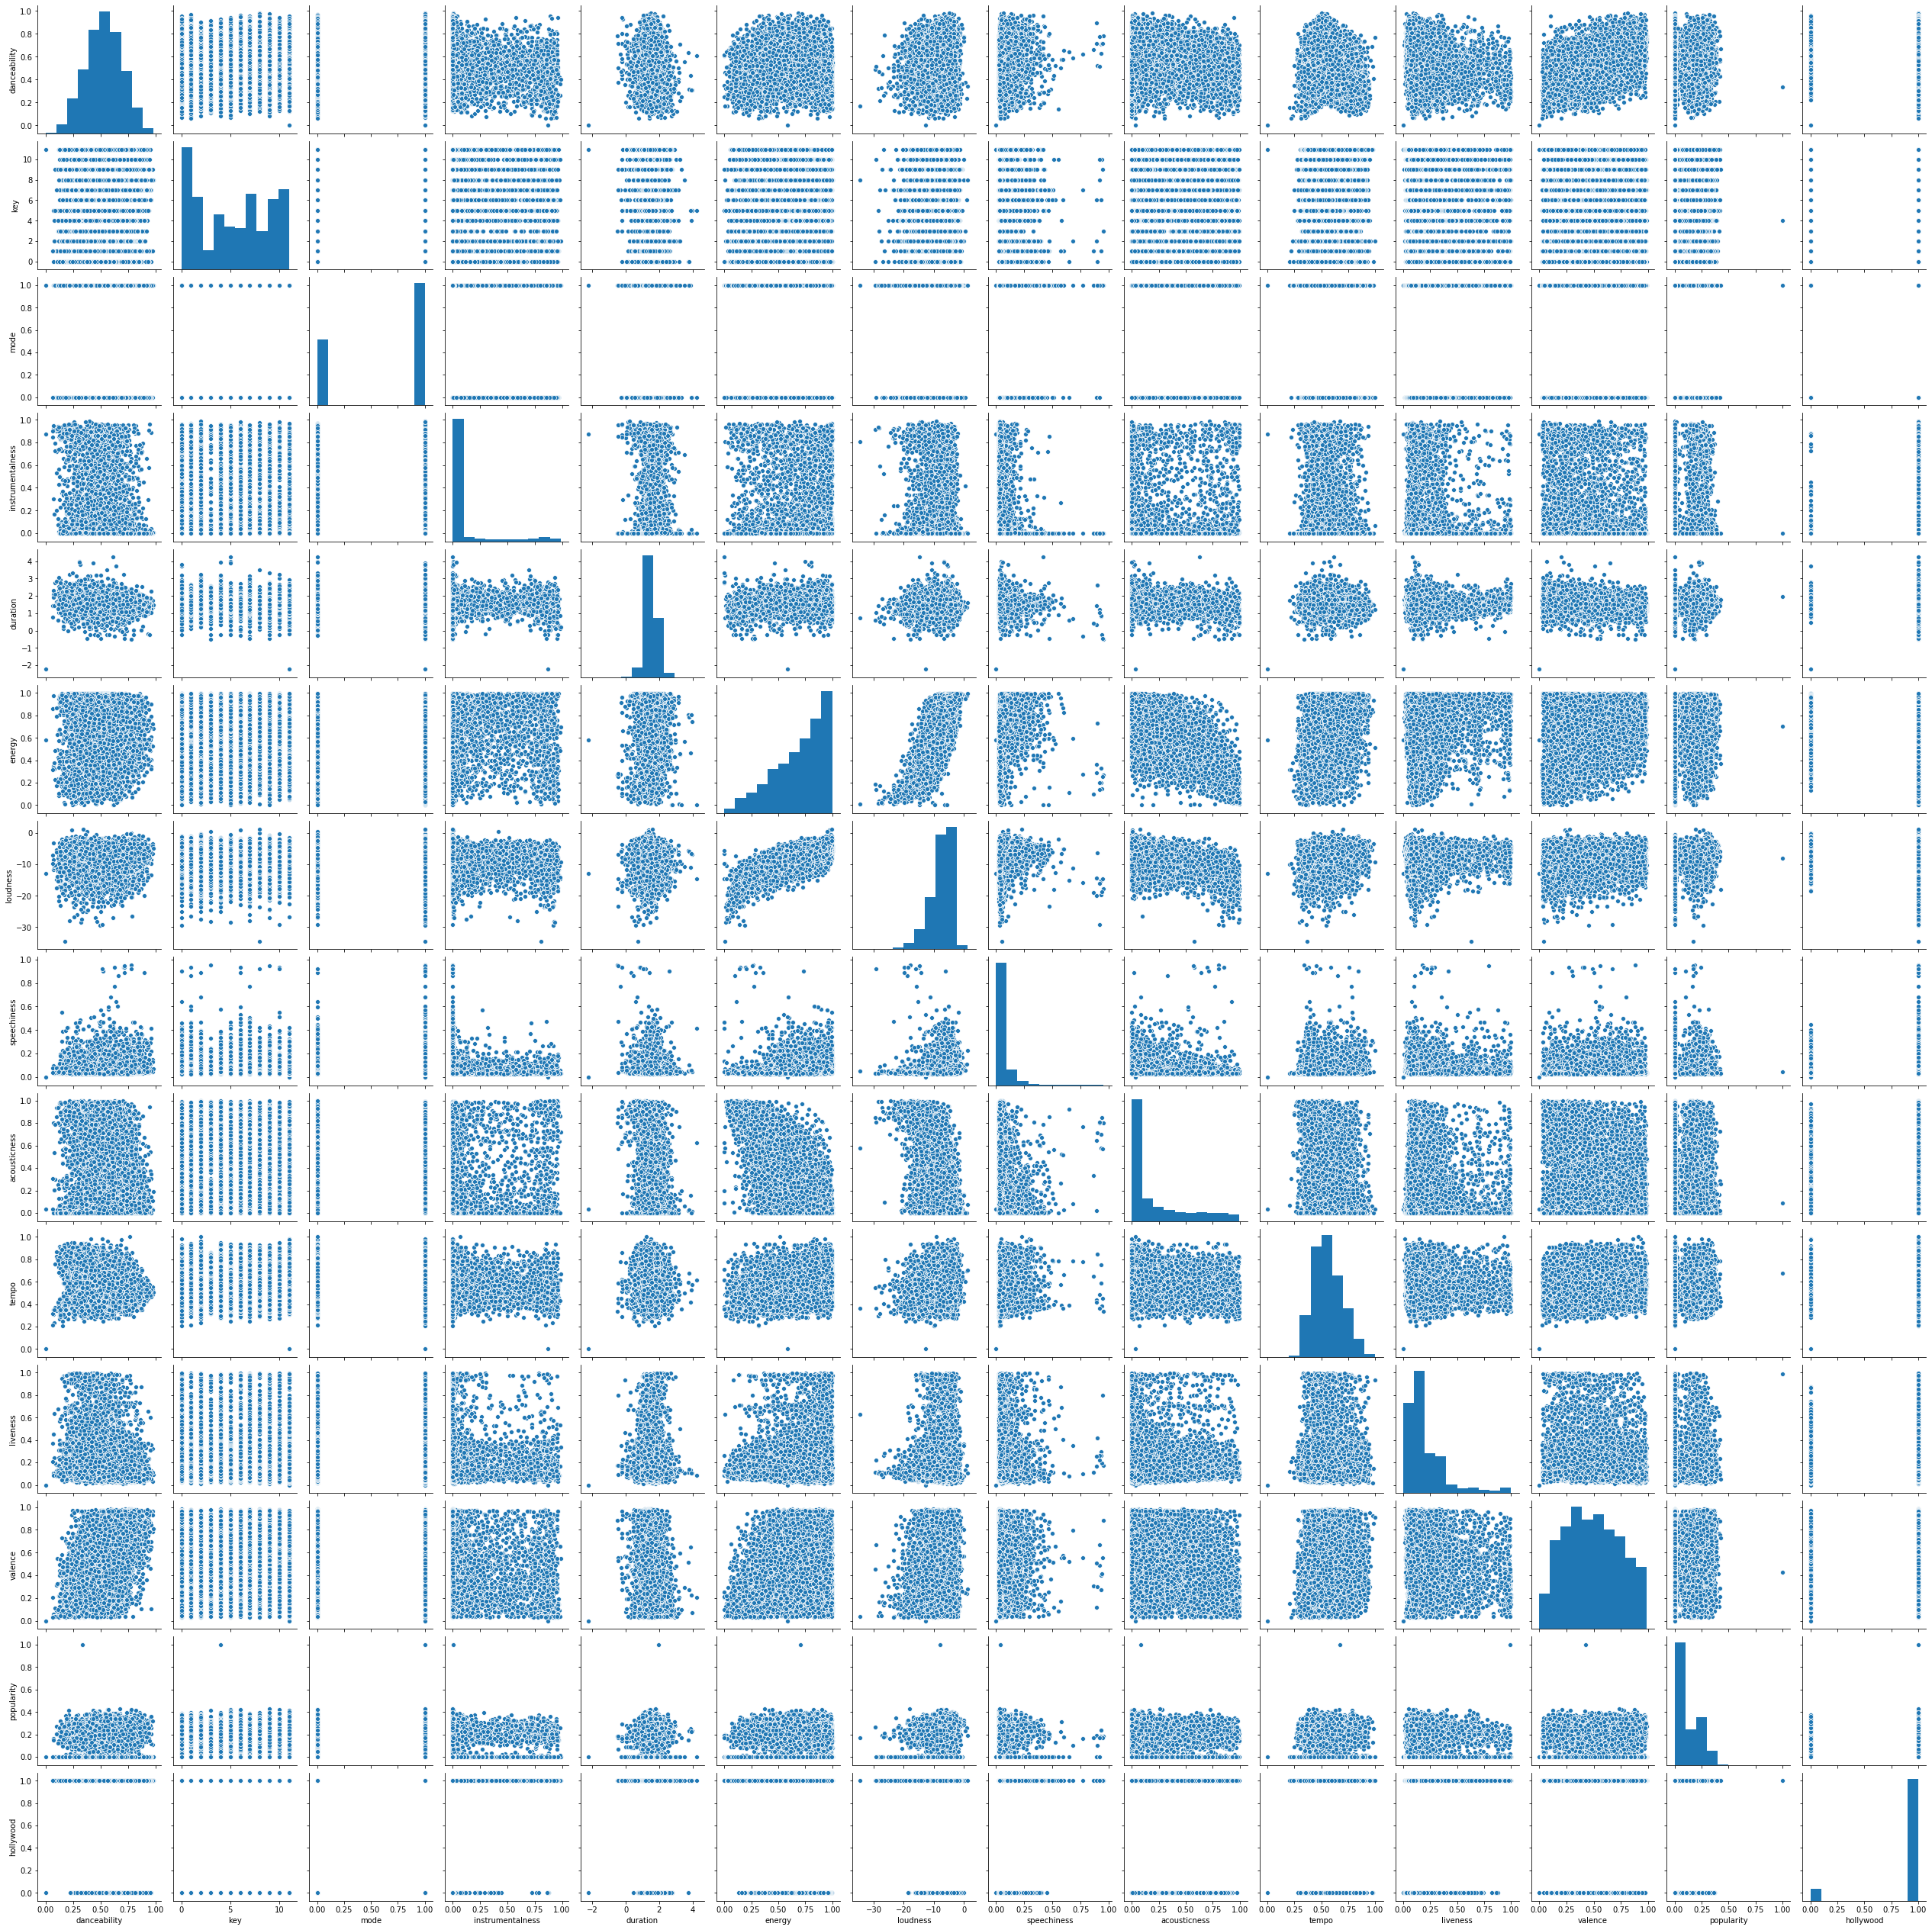

In [24]:
sns.pairplot(df_og)

# THANK YOU